<a href="https://colab.research.google.com/github/Jyotika999/IIT2019036-Bit-By-Bit/blob/main/Analysis_Hepatitis_SOE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Hepatitis Dataset and Prediction

# Import Libraries and Exploratory Data Analysis

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
# use seaborn plotting defaults
import seaborn as sns; sns.set()
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/manfye/Predict-Hepatitis/main/hepatitis.data")

In [3]:
df.shape

(154, 20)

In [4]:
columNames=['Class','AGE','SEX','STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA','LIVER BIG','LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES','VARICES','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY']

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/manfye/Predict-Hepatitis/main/hepatitis.data", names=columNames)

In [6]:
df.head(5)

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [7]:
df.replace("?",np.nan, inplace = True)
df.isnull().sum()

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER BIG          10
LIVER FIRM         11
SPLEEN PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           6
ALK PHOSPHATE      29
SGOT                4
ALBUMIN            16
PROTIME            67
HISTOLOGY           0
dtype: int64

In [8]:
df_ori = df

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            155 non-null    int64 
 1   AGE              155 non-null    int64 
 2   SEX              155 non-null    int64 
 3   STEROID          154 non-null    object
 4   ANTIVIRALS       155 non-null    int64 
 5   FATIGUE          154 non-null    object
 6   MALAISE          154 non-null    object
 7   ANOREXIA         154 non-null    object
 8   LIVER BIG        145 non-null    object
 9   LIVER FIRM       144 non-null    object
 10  SPLEEN PALPABLE  150 non-null    object
 11  SPIDERS          150 non-null    object
 12  ASCITES          150 non-null    object
 13  VARICES          150 non-null    object
 14  BILIRUBIN        149 non-null    object
 15  ALK PHOSPHATE    126 non-null    object
 16  SGOT             151 non-null    object
 17  ALBUMIN          139 non-null    ob

In [10]:
numerical_variables = ['AGE', 'BILIRUBIN', 'PROTIME', 'ALBUMIN', 'ALK PHOSPHATE', 'SGOT']

# Handling of missing data



In [11]:
df["BILIRUBIN"] = df.BILIRUBIN.astype(float)
df["PROTIME"] = df.PROTIME.astype(float)
df["ALK PHOSPHATE"] = df["ALK PHOSPHATE"].astype(float)
df["SGOT"] = df.SGOT.astype(float)
df["ALBUMIN"] = df.ALBUMIN.astype(float)

In [12]:
df[numerical_variables].dtypes

AGE                int64
BILIRUBIN        float64
PROTIME          float64
ALBUMIN          float64
ALK PHOSPHATE    float64
SGOT             float64
dtype: object

In [13]:
df[numerical_variables].describe()

,AGE,BILIRUBIN,PROTIME,ALBUMIN,ALK PHOSPHATE,SGOT
count,155.000000,149.000000,88.000000,139.000000,126.000000,151.00000
mean,41.200000,1.427517,61.852273,3.817266,105.325397,85.89404
std,12.565878,1.212149,22.875244,0.651523,51.508109,89.65089
min,7.000000,0.300000,0.000000,2.100000,26.000000,14.00000
25%,32.000000,0.700000,46.000000,3.400000,74.250000,31.50000
50%,39.000000,1.000000,61.000000,4.000000,85.000000,58.00000
75%,50.000000,1.500000,76.250000,4.200000,132.250000,100.50000
max,78.000000,8.000000,100.000000,6.400000,295.000000,648.00000


In [14]:
df[numerical_variables].fillna(df[numerical_variables].mean()).head(5)

,AGE,BILIRUBIN,PROTIME,ALBUMIN,ALK PHOSPHATE,SGOT
0,30,1.0,61.852273,4.0,85.000000,18.0
1,50,0.9,61.852273,3.5,135.000000,42.0
2,78,0.7,61.852273,4.0,96.000000,32.0
3,31,0.7,80.000000,4.0,46.000000,52.0
4,34,1.0,61.852273,4.0,105.325397,200.0


In [15]:
categorical_variables = ['SEX' , 'STEROID', 'ANTIVIRALS', 'FATIGUE','MALAISE','ANOREXIA','LIVER BIG','LIVER FIRM','SPLEEN PALPABLE',
'SPIDERS','ASCITES','VARICES', 'HISTOLOGY']
df[categorical_variables].apply(pd.Series.value_counts)


,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,HISTOLOGY
1,139.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0
2,16.0,NaN,131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0
1,NaN,76.0,NaN,100.0,61.0,32.0,25.0,60.0,30.0,51.0,20.0,18.0,NaN
2,NaN,78.0,NaN,54.0,93.0,122.0,120.0,84.0,120.0,99.0,130.0,132.0,NaN


In [16]:
#Impute the values using scikit-learn SimpleImpute Class
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imp_mean.fit(df_ori)
imputed_train_df = imp_mean.transform(df_ori)

In [17]:
imputedDf = pd.DataFrame(imputed_train_df,columns=columNames)

In [18]:
imputedDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            155 non-null    object
 1   AGE              155 non-null    object
 2   SEX              155 non-null    object
 3   STEROID          155 non-null    object
 4   ANTIVIRALS       155 non-null    object
 5   FATIGUE          155 non-null    object
 6   MALAISE          155 non-null    object
 7   ANOREXIA         155 non-null    object
 8   LIVER BIG        155 non-null    object
 9   LIVER FIRM       155 non-null    object
 10  SPLEEN PALPABLE  155 non-null    object
 11  SPIDERS          155 non-null    object
 12  ASCITES          155 non-null    object
 13  VARICES          155 non-null    object
 14  BILIRUBIN        155 non-null    object
 15  ALK PHOSPHATE    155 non-null    object
 16  SGOT             155 non-null    object
 17  ALBUMIN          155 non-null    ob

In [19]:
imputedDf.count()

Class              155
AGE                155
SEX                155
STEROID            155
ANTIVIRALS         155
FATIGUE            155
MALAISE            155
ANOREXIA           155
LIVER BIG          155
LIVER FIRM         155
SPLEEN PALPABLE    155
SPIDERS            155
ASCITES            155
VARICES            155
BILIRUBIN          155
ALK PHOSPHATE      155
SGOT               155
ALBUMIN            155
PROTIME            155
HISTOLOGY          155
dtype: int64

In [20]:
imputedDf[categorical_variables].apply(pd.Series.value_counts)

,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,HISTOLOGY
1,139.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0
2,16.0,NaN,131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0
1,NaN,76.0,NaN,101.0,61.0,32.0,25.0,60.0,30.0,51.0,20.0,18.0,NaN
2,NaN,79.0,NaN,54.0,94.0,123.0,130.0,95.0,125.0,104.0,135.0,137.0,NaN


In [21]:
imputedDf[categorical_variables] = imputedDf[categorical_variables].astype(int)

In [22]:
imputedDf[categorical_variables].apply(pd.Series.value_counts)

,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,HISTOLOGY
1,139,76,24,101,61,32,25,60,30,51,20,18,85
2,16,79,131,54,94,123,130,95,125,104,135,137,70


In [23]:
imputedDf.describe()

,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,HISTOLOGY
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.103226,1.509677,1.845161,1.348387,1.606452,1.793548,1.838710,1.612903,1.806452,1.670968,1.870968,1.883871,1.451613
std,0.305240,0.501527,0.362923,0.478004,0.490120,0.406070,0.368991,0.488665,0.396360,0.471385,0.336322,0.321418,0.499266
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000
50%,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
75%,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [24]:
imputedDf["Class"] = imputedDf["Class"].astype(int)

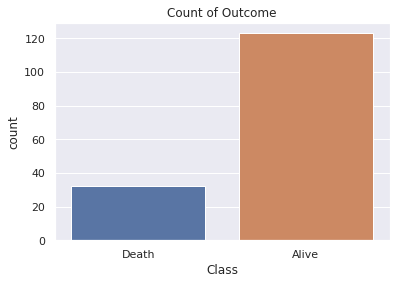

In [25]:
class_count=sns.countplot(x="Class", data=imputedDf)
plt.gca().set_xticklabels(['Death','Alive']);
class_count.set_title("Count of Outcome")
class_count.figure.savefig('class_count.png')


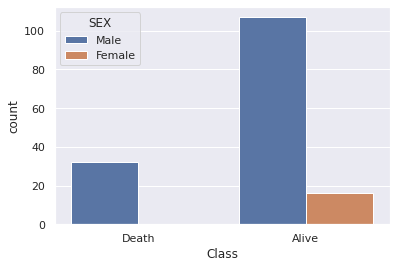

In [26]:
class_count=sns.countplot(x="Class",hue="SEX", data=imputedDf)
plt.gca().set_xticklabels(['Death','Alive']);
plt.legend(title='SEX', loc='upper left', labels=['Male', 'Female'])
plt.show(class_count)

In [27]:
imputedDf.isnull()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
151,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
153,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


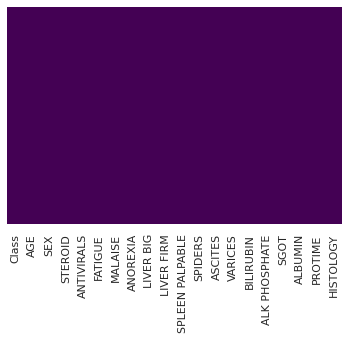

In [28]:
sns.heatmap(imputedDf.isnull(), yticklabels=False, cbar = False, cmap='viridis')  #no null value detected

In [29]:
imputedDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            155 non-null    int64 
 1   AGE              155 non-null    object
 2   SEX              155 non-null    int64 
 3   STEROID          155 non-null    int64 
 4   ANTIVIRALS       155 non-null    int64 
 5   FATIGUE          155 non-null    int64 
 6   MALAISE          155 non-null    int64 
 7   ANOREXIA         155 non-null    int64 
 8   LIVER BIG        155 non-null    int64 
 9   LIVER FIRM       155 non-null    int64 
 10  SPLEEN PALPABLE  155 non-null    int64 
 11  SPIDERS          155 non-null    int64 
 12  ASCITES          155 non-null    int64 
 13  VARICES          155 non-null    int64 
 14  BILIRUBIN        155 non-null    object
 15  ALK PHOSPHATE    155 non-null    object
 16  SGOT             155 non-null    object
 17  ALBUMIN          155 non-null    ob

In [30]:
print(imputedDf)

     Class AGE  SEX  STEROID  ...  SGOT  ALBUMIN  PROTIME  HISTOLOGY
0        2  30    2        1  ...    18        4      100          1
1        2  50    1        1  ...    42      3.5      100          1
2        2  78    1        2  ...    32        4      100          1
3        2  31    1        2  ...    52        4       80          1
4        2  34    1        2  ...   200        4      100          1
..     ...  ..  ...      ...  ...   ...      ...      ...        ...
150      1  46    1        2  ...   242      3.3       50          2
151      2  44    1        2  ...   142      4.3      100          2
152      2  61    1        1  ...    20      4.1      100          2
153      2  53    2        1  ...    19      4.1       48          2
154      1  43    1        2  ...    19      3.1       42          2

[155 rows x 20 columns]


In [31]:

imputedDf.isnull().mean().sort_values(ascending=False).head(5)

HISTOLOGY    0.0
PROTIME      0.0
AGE          0.0
SEX          0.0
STEROID      0.0
dtype: float64

In [32]:
print(imputedDf.columns)

Index(['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE',
       'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS',
       'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN',
       'PROTIME', 'HISTOLOGY'],
      dtype='object')


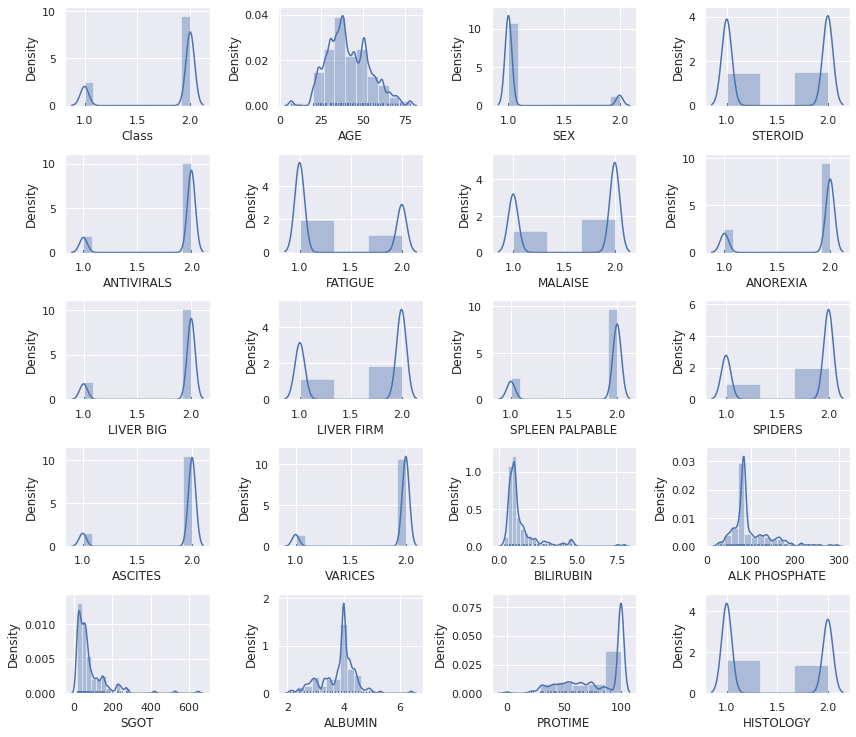

In [33]:
fig = plt.figure(figsize=(12,18))
for i in range(len(imputedDf.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(imputedDf.iloc[:,i].dropna(), rug=True, hist=True, label='UW', kde_kws={'bw':0.1})
    plt.xlabel(imputedDf.columns[i])
plt.tight_layout()
plt.show()

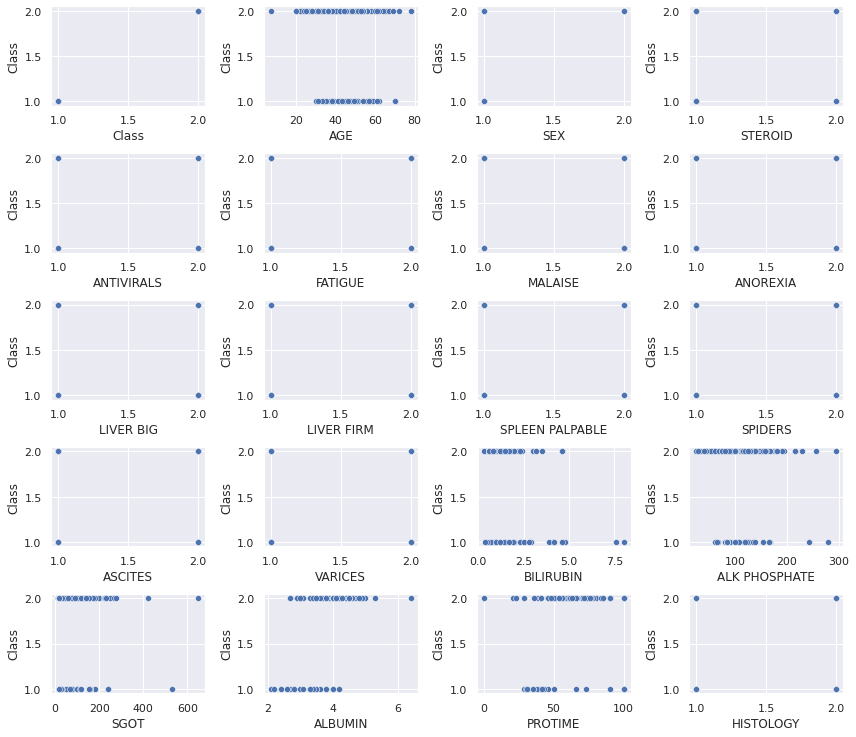

In [34]:

fig3 = plt.figure(figsize=(12,18))
for i in range(len(imputedDf.columns)):
    fig3.add_subplot(9, 4, i+1)
    sns.scatterplot(imputedDf.iloc[:, i],imputedDf['Class'])
plt.tight_layout()
plt.show()

# Covariance matrix for feature selection

In [35]:
corrmat = imputedDf.corr(method ='spearman')

In [36]:
corrmat["Class"]

Class              1.000000
SEX                0.173051
STEROID            0.137413
ANTIVIRALS        -0.130196
FATIGUE            0.306049
MALAISE            0.339530
ANOREXIA           0.133638
LIVER BIG         -0.093665
LIVER FIRM         0.020057
SPLEEN PALPABLE    0.234261
SPIDERS            0.389137
ASCITES            0.469334
VARICES            0.362385
HISTOLOGY         -0.337856
Name: Class, dtype: float64

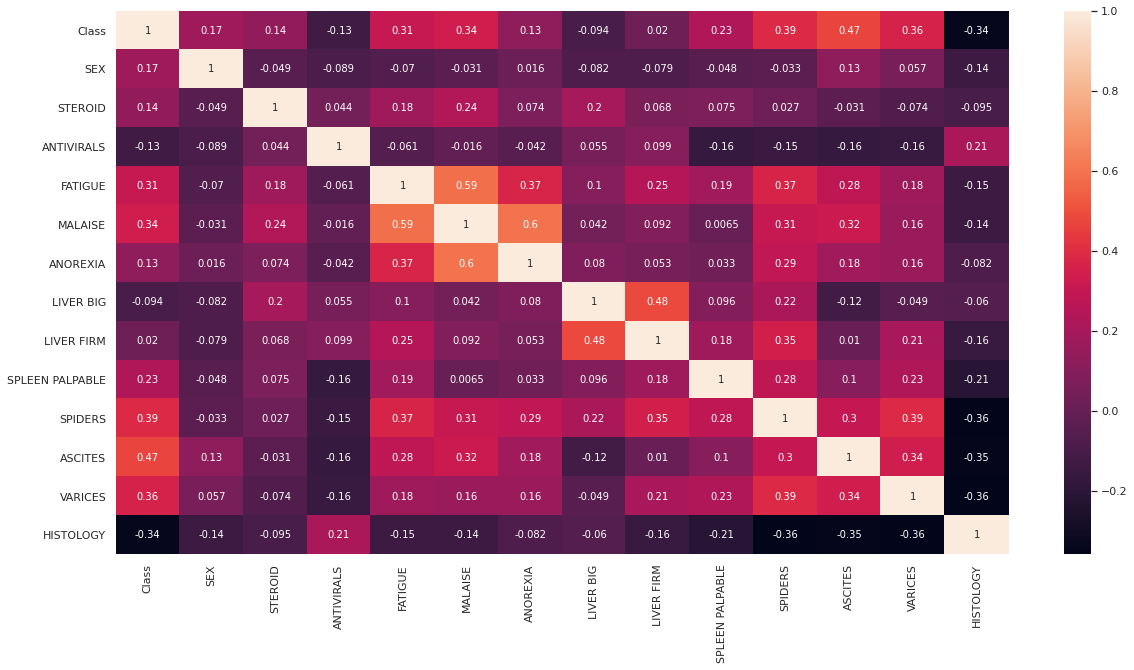

In [37]:
plt.figure(figsize=(20,10))
g=sns.heatmap(corrmat,annot=True)
g.figure.savefig('g.png')

In [38]:
imputedDf[numerical_variables] = imputedDf[numerical_variables].astype(float)

In [39]:
numerical_class = ['AGE', 'BILIRUBIN', 'PROTIME', 'ALBUMIN', 'ALK PHOSPHATE', 'SGOT','Class']

In [ ]:
pairplot = sns.pairplot(imputedDf[numerical_class] ,hue="Class",palette='winter')
plt.show(pairplot)

In [ ]:
ax = sns.distplot(imputedDf["BILIRUBIN"], fit=stats.norm, kde=True)

In [ ]:
sns.distplot(imputedDf['ALBUMIN'], fit=stats.norm, kde=True);

# Feature Engineering 


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report,confusion_matrix

sc=StandardScaler()
sc.fit(imputedDf.drop(["Class","PROTIME","BILIRUBIN"], axis = 1))
scaled_features = sc.transform(imputedDf.drop(["Class","PROTIME","BILIRUBIN"], axis = 1))
X =scaled_features
y = imputedDf["Class"] 

# Classification on survived 'class' (target attribute) print(y) # Split dataset in training and test datasets 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=3)

In [ ]:
class_nobalance = pd.Series(y_train).value_counts().plot.bar()
class_nobalance.set_title("Outcome ytrain (Without SMOTE)")
plt.gca().set_xticklabels(['Death','Alive']);
class_nobalance.figure.savefig('class_nobalance.png')

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.datasets import make_classification

sm = SMOTE(random_state = 33)
X_train_new, y_train_new = sm.fit_sample(X_train, y_train.ravel())
class_balance = pd.Series(y_train_new).value_counts().plot.bar()
class_balance.set_title("Outcome ytrain (SMOTE)")
plt.gca().set_xticklabels(['Death','Alive']);
class_balance.figure.savefig('class_balance.png')

# Machine Learning Classifier
Create a scoreDF to store the performance of each classifier

In [ ]:
from sklearn.model_selection import cross_validate

scoreDF = pd.DataFrame(columns=['accuracy','f1','recall',"roc_auc","type","balance"])

# Naive Bayes



In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB 
gnb = GaussianNB()
gnb.fit(X_train,y_train)

# Test the classifier 
gnbpredict = gnb.predict(X_test)
# Print results 

score = cross_validate(gnb, X_train, y_train, cv=10,scoring=['accuracy','f1','recall',"roc_auc"])
print("Test accuracy:{}".format(score["test_accuracy"].mean()))
data =[score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(),
       score["test_roc_auc"].mean(),"NaiveB","No"]
scoreDF = scoreDF.append(pd.DataFrame([data], columns=scoreDF.columns), ignore_index=True, );

#print(metrics.accuracy_score(y_test,gnbpredict))

gnb = GaussianNB()
gnb.fit(X_train_new,y_train_new)

# Test the classifier 
gnbpredict = gnb.predict(X_test)

score = cross_validate(gnb, X_train_new, y_train_new, cv=10, scoring=['accuracy', 'f1','recall',"roc_auc"])
print("Test accuracy:{}".format(score["test_accuracy"].mean()))

data =[score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(),
       score["test_roc_auc"].mean(),"NaiveB","Yes"]
scoreDF = scoreDF.append(pd.DataFrame([data], columns=scoreDF.columns), ignore_index=True, );


# Support Vector Machine (SVM)



In [ ]:
from sklearn.svm import SVC

svc_model1 = SVC(kernel="poly", C=1,gamma="auto")
svc_model2 = SVC(kernel="rbf", C=1,gamma="auto")
svc_model3 = SVC(kernel="sigmoid", C=1,gamma="auto")
svc_model4 = SVC(kernel="linear", C=1,gamma="auto")

score = cross_validate(svc_model1, X_train_new, y_train_new, cv=10, scoring=['accuracy', 'f1','recall',"roc_auc"])
print("Test accuracy of Poly Kernal:{}".format(score["test_accuracy"].mean()))
score = cross_validate(svc_model2, X_train_new, y_train_new, cv=10, scoring=['accuracy', 'f1','recall',"roc_auc"])
print("Test accuracy of rbf Kernal:{}".format(score["test_accuracy"].mean()))
score = cross_validate(svc_model3, X_train_new, y_train_new, cv=10, scoring=['accuracy', 'f1','recall',"roc_auc"])
print("Test accuracy of sigmoid Kernal:{}".format(score["test_accuracy"].mean()))
score = cross_validate(svc_model4, X_train_new, y_train_new, cv=10, scoring=['accuracy', 'f1','recall',"roc_auc"])
print("Test accuracy of linear Kernal:{}".format(score["test_accuracy"].mean()))

In [ ]:
svc=SVC(kernel="rbf",gamma="auto", C=1) # The default kernel used by SVC is the gaussian kernel
svc.fit(X_train, y_train)
SVMprediction = svc.predict(X_test)

score = cross_validate(svc, X_train, y_train, cv=10,scoring=['accuracy','f1','recall',"roc_auc"])
print("Test accuracy:{}".format(score["test_accuracy"].mean()))
data =[score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(),
       score["test_roc_auc"].mean(),"SVC","No"]
scoreDF = scoreDF.append(pd.DataFrame([data], columns=scoreDF.columns), ignore_index=True, );


svc.fit(X_train_new,y_train_new)
SVMprediction = svc.predict(X_test)

score = cross_validate(svc, X_train_new, y_train_new, cv=10, scoring=['accuracy', 'f1','recall',"roc_auc"])
print("Test accuracy:{}".format(score["test_accuracy"].mean()))

data =[score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(),
       score["test_roc_auc"].mean(),"SVC","Yes"]
scoreDF = scoreDF.append(pd.DataFrame([data], columns=scoreDF.columns), ignore_index=True, );


# KNN Classifier


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
scores=[]
lrange=list(range(1,20))
for k in lrange:
# input the k value and 'distance' measure 
    knn=KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='auto')

    score = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    scores.append(score.mean())

optimal_k = lrange[scores.index(max(scores))]
print("The optimal number of neighbors [unbalance dataset] is %d" % optimal_k)
print("The optimal score is %.2f" % max(scores))

plt.figure(2,figsize=(15,5))
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [ ]:
scores=[]
lrange=list(range(1,20))
for k in lrange:
# input the k value and 'distance' measure 
    knn=KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='auto')

    score = cross_val_score(knn, X_train_new, y_train_new, cv=10, scoring='accuracy')
    scores.append(score.mean())

optimal_k = lrange[scores.index(max(scores))]
print("The optimal number of neighbors [balance dataset] is %d" % optimal_k)
print("The optimal score is %.2f" % max(scores))

plt.figure(2,figsize=(15,5))
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knnpred = knn.predict(X_test)

score = cross_validate(knn, X_train, y_train, cv=10,scoring=['accuracy','f1','recall',"roc_auc"])
print("Test accuracy:{}".format(score["test_accuracy"].mean()))
data =[score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(),
       score["test_roc_auc"].mean(),"KNN","No"]
scoreDF = scoreDF.append(pd.DataFrame([data], columns=scoreDF.columns), ignore_index=True, );

#print(metrics.accuracy_score(y_test,knnpred))

knn.fit(X_train_new,y_train_new)
knnpred = knn.predict(X_test)

score = cross_validate(knn, X_train_new, y_train_new, cv=10, scoring=['accuracy', 'f1','recall',"roc_auc"])
print("Test accuracy:{}".format(score["test_accuracy"].mean()))

data =[score["test_accuracy"].mean(), score["test_f1"].mean(), score["test_recall"].mean(),
       score["test_roc_auc"].mean(),"KNN","Yes"]
scoreDF = scoreDF.append(pd.DataFrame([data], columns=scoreDF.columns), ignore_index=True, );

# Performance Evaluation

In [ ]:
scoreDF

In [ ]:
accuracyPlot = sns.barplot(x='type',y='accuracy',data=scoreDF, hue="balance")
accuracyPlot.set_title("Classifier Mean Accuracy")
accuracyPlot.figure.savefig('accuracyPlot.png')

In [ ]:
f1Plot = sns.barplot(x='type',y='f1',data=scoreDF, hue="balance");
f1Plot.set_title("Classifier Mean F1-Score")
f1Plot.figure.savefig('f1Plot.png')

In [ ]:
recallPlot = sns.barplot(x='type',y='recall',data=scoreDF, hue="balance");
recallPlot.set_title("Classifier Mean Recall-Score")
recallPlot.figure.savefig('recallPlot.png')

In [ ]:
rocPlot = sns.barplot(x='type',y='roc_auc',data=scoreDF, hue="balance");
rocPlot.set_title("Classifier Mean ROC-AUC")
rocPlot.figure.savefig('rocPlot.png')